In [37]:
!pip install scikeras

Epoch 1/15
664/664 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5141 - loss: 0.7863 - val_accuracy: 0.5267 - val_loss: 0.7085
Epoch 2/15
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5363 - loss: 0.7039 - val_accuracy: 0.5399 - val_loss: 0.6939
Epoch 3/15
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5481 - loss: 0.6880 - val_accuracy: 0.5483 - val_loss: 0.6898
Epoch 4/15
664/664 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5625 - loss: 0.6822 - val_accuracy: 0.5505 - val_loss: 0.6876
Epoch 5/15
664/664 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5694 - loss: 0.6765 - val_accuracy: 0.5645 - val_loss: 0.6854
Epoch 6/15
664/664 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5764 - loss: 0.6731 - val_accuracy: 0.5611 - val_loss: 0.6848
Epoch 7/15
664/664 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5801 - loss: 0.6727 - val_accuracy: 0.5623 - val_loss: 0.6855
Epoch 8/15
664/664 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5872 - loss: 0.6708 - val_accuracy: 0.

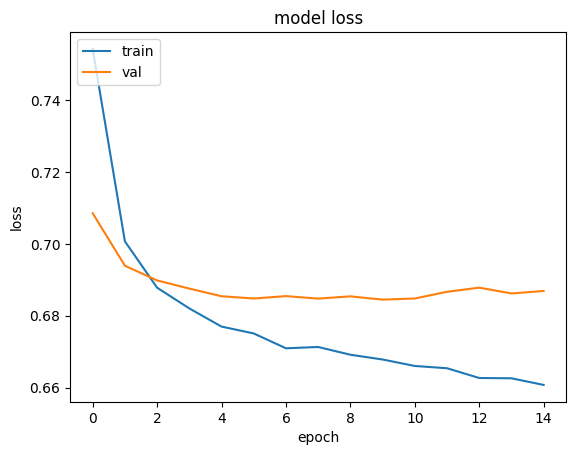

In [38]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import ConfusionMatrixDisplay

def loadDataAndTargets():
    """Reads and loads the data csv file"""

    df = pd.read_csv("/content/cleaned_tier_data_small.csv") # -- used for Google Colab

    return df.to_numpy()

def tt_split(feature_clean, target_clean):
    """Executes a typical test train split"""
    feature_train, feature_test, target_train, target_test = train_test_split(feature_clean, target_clean, stratify = target_clean, random_state = 0)

    return feature_train, feature_test, target_train, target_test



data = loadDataAndTargets()

num_data_rows, num_data_cols = np.shape(data)
iron_feature = data[:, 1:(num_data_cols - 1)]
iron_target = data[:, num_data_cols - 1].astype(int)

iron_X_train, iron_X_test, iron_y_train, iron_y_test = tt_split(iron_feature, iron_target)

def create_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input(shape = (349, ))) #2019
    model.add(tf.keras.layers.Dense(11, activation = 'relu'))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(2))

    opt = tf.keras.optimizers.Adam(learning_rate = 0.0003)
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
    model.compile(optimizer = opt,
              loss = loss_fn,
              metrics = ['accuracy'])

    return model

# Convert arrays to tensors
iron_X_train = tf.convert_to_tensor(iron_X_train, dtype = tf.float32)
iron_y_train = tf.convert_to_tensor(iron_y_train, dtype = tf.float32)
iron_X_test = tf.convert_to_tensor(iron_X_test, dtype = tf.float32)
iron_y_test = tf.convert_to_tensor(iron_y_test, dtype = tf.float32)

scaler = StandardScaler()
scaler.fit(iron_X_train)

scaled_X_train = scaler.transform(iron_X_train)
scaled_X_test = scaler.transform(iron_X_test)

model = create_model()

history = model.fit(scaled_X_train, iron_y_train, validation_split = 0.1, epochs = 15)

print('Train Score: ', model.evaluate(scaled_X_train, iron_y_train))
print('Test Score: ', model.evaluate(scaled_X_test, iron_y_test))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

In [39]:
# Note the odd formatting of the prediction output
X = scaled_X_train[107, :]
X = tf.reshape(X, (1, -1))

y = model.predict(X)
print(np.shape(y))
print(y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
(1, 2)
[[0.70360833 1.2338276 ]]
